In [1]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import sklearn

In [3]:
sklearn.__version__

'1.0.2'

In [4]:
print(sklearn.__doc__)


Machine learning module for Python

sklearn is a Python module integrating classical machine
learning algorithms in the tightly-knit world of scientific Python
packages (numpy, scipy, matplotlib).

It aims to provide simple and efficient solutions to learning problems
that are accessible to everybody and reusable in various contexts:
machine-learning as a versatile tool for science and engineering.

See http://scikit-learn.org for complete documentation.



In [5]:
sklearn.__all__

['calibration',
 'cluster',
 'covariance',
 'cross_decomposition',
 'datasets',
 'decomposition',
 'dummy',
 'ensemble',
 'exceptions',
 'experimental',
 'externals',
 'feature_extraction',
 'feature_selection',
 'gaussian_process',
 'inspection',
 'isotonic',
 'kernel_approximation',
 'kernel_ridge',
 'linear_model',
 'manifold',
 'metrics',
 'mixture',
 'model_selection',
 'multiclass',
 'multioutput',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised',
 'svm',
 'tree',
 'discriminant_analysis',
 'impute',
 'compose',
 'clone',
 'get_config',
 'set_config',
 'config_context',
 'show_versions']

# Linear Regression Example

In [ ]:
# Data set is available at https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [4]:
car_mpg = pd.read_csv("https://raw.githubusercontent.com/arshad831/machinelearning/main/auto-mpg.csv",
                     header=None)

In [5]:
car_mpg.shape

(398, 9)

In [6]:
car_mpg.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""


In [7]:
col_names = ["mpg","cylinders",
             "displacement",
             "horsepower",
             "weight",
             "acceleration",
             "model_year",
             "origin",
             "car_name"]    

In [8]:
car_mpg.columns = col_names
car_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""


In [9]:
car_mpg['car_name'].nunique()

305

In [10]:
car_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
#Lets drop the car column
car_mpg.drop(columns=['car_name'],inplace=True)

In [12]:
car_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [13]:
car_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [14]:
car_mpg['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [15]:
car_mpg.loc[car_mpg['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [16]:
list(car_mpg.loc[car_mpg['horsepower'] == '?'].index)

[32, 126, 330, 336, 354, 374]

In [17]:
car_mpg.drop(list(car_mpg.loc[car_mpg['horsepower'] == '?'].index),inplace=True)

In [18]:
car_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [19]:
car_mpg['horsepower'] = car_mpg['horsepower'].astype(int)

In [20]:
car_mpg['horsepower'] = car_mpg['horsepower'].apply(lambda x : int(x))

In [21]:
car_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [22]:
car_mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

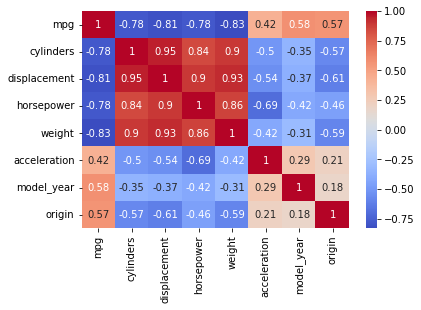

In [23]:
sns.heatmap(car_mpg.corr(),
            annot=True,
            yticklabels=True,
            cmap='coolwarm')

In [24]:
# Divide the dataset in features & target variable

X = car_mpg.drop(columns=['mpg'])
y = car_mpg['mpg']

In [25]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [26]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [27]:
#Divide the dataset in Train & Test split
#total 100 records 20 records will go in TEST & TRAIN will have 80 total 100%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=101)

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 119 to 356
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     294 non-null    int64  
 1   displacement  294 non-null    float64
 2   horsepower    294 non-null    int64  
 3   weight        294 non-null    int64  
 4   acceleration  294 non-null    float64
 5   model_year    294 non-null    int64  
 6   origin        294 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 18.4 KB


In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 39 to 262
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     98 non-null     int64  
 1   displacement  98 non-null     float64
 2   horsepower    98 non-null     int64  
 3   weight        98 non-null     int64  
 4   acceleration  98 non-null     float64
 5   model_year    98 non-null     int64  
 6   origin        98 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 6.1 KB


In [28]:
#check train split
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
119,4,114.0,91,2582,14.0,73,2
378,4,105.0,63,2125,14.7,82,1
132,4,140.0,75,2542,17.0,74,1
16,6,199.0,97,2774,15.5,70,1
207,4,130.0,102,3150,15.7,76,2


In [29]:
#Target variable
y_train.head()

119    20.0
378    38.0
132    25.0
16     18.0
207    20.0
Name: mpg, dtype: float64

In [ ]:
#Check test data
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
39,8,400.0,175,4464,11.5,71,1
285,8,305.0,130,3840,15.4,79,1
164,6,231.0,110,3039,15.0,75,1
220,4,85.0,70,1945,16.8,77,3
163,6,225.0,95,3785,19.0,75,1


In [ ]:
y_test.head()

39     14.0
285    17.0
164    21.0
220    33.5
163    18.0
Name: mpg, dtype: float64

In [32]:
# Define model
regression_model = LinearRegression()

In [ ]:
regression_model

LinearRegression()

In [33]:
#Train the model
regression_model.fit(X_train,y_train)

LinearRegression()

In [34]:
regression_model

LinearRegression()

In [35]:
regression_model.intercept_

-23.7712732798699

In [36]:
regression_model.coef_

array([-2.59947511e-01,  1.66230904e-02,  1.05075652e-03, -7.15925643e-03,
        2.11920558e-01,  8.08733763e-01,  1.20488734e+00])

In [58]:
for idx,col_name in enumerate(X_train.columns):
    print("The Cofficients for {} is {}".format(col_name,regression_model.coef_[idx]))

The Cofficients for cylinders is -0.2599475114053124
The Cofficients for displacement is 0.016623090352000623
The Cofficients for horsepower is 0.0010507565243943347
The Cofficients for weight is -0.007159256433144254
The Cofficients for acceleration is 0.21192055755564201
The Cofficients for model_year is 0.8087337634981283
The Cofficients for origin is 1.204887341156613


In [59]:
regression_model.coef_

array([-2.59947511e-01,  1.66230904e-02,  1.05075652e-03, -7.15925643e-03,
        2.11920558e-01,  8.08733763e-01,  1.20488734e+00])

In [55]:
regression_model

LinearRegression()

In [38]:
# Predict the data
regression_model.predict(X_test)

array([10.08541541, 20.22267408, 21.90630641, 32.19812573, 17.29768345,
       20.43857583, 29.75975002, 19.75459278, 23.57010803, 25.98664324,
       30.61384579, 28.76377528, 29.73424384, 29.14975598, 28.9830795 ,
       23.92925098, 13.21917942, 24.30155174,  9.99032765, 17.4470576 ,
       28.09812233, 24.12452815, 21.17984507, 15.65527264, 30.26930867,
       31.33029534, 26.51496533, 10.2048196 , 25.6286061 , 11.51955323,
       34.93949003, 33.94640526, 26.73284356, 28.89667922, 30.16802524,
       26.10601052, 28.89372368, 16.2208353 ,  5.35171834, 24.77910399,
       29.7055307 , 22.77370924, 15.019239  , 15.53540093, 11.91145438,
       26.20004645, 28.99786067, 16.57803201, 14.56589262, 20.85734723,
       26.0655035 , 14.66556703, 34.80511723, 34.84538544, 23.88055224,
       22.15694662,  8.71540281, 24.85048156, 20.95974509, 29.8925882 ,
       28.65215291, 12.45100697, 27.07798524, 23.75645664, 21.1833999 ,
       15.19191532, 14.94219468, 23.00564183, 24.94350036, 18.87

In [39]:
pred = regression_model.predict(X_test)

In [66]:
pred

array([10.08541541, 20.22267408, 21.90630641, 32.19812573, 17.29768345,
       20.43857583, 29.75975002, 19.75459278, 23.57010803, 25.98664324,
       30.61384579, 28.76377528, 29.73424384, 29.14975598, 28.9830795 ,
       23.92925098, 13.21917942, 24.30155174,  9.99032765, 17.4470576 ,
       28.09812233, 24.12452815, 21.17984507, 15.65527264, 30.26930867,
       31.33029534, 26.51496533, 10.2048196 , 25.6286061 , 11.51955323,
       34.93949003, 33.94640526, 26.73284356, 28.89667922, 30.16802524,
       26.10601052, 28.89372368, 16.2208353 ,  5.35171834, 24.77910399,
       29.7055307 , 22.77370924, 15.019239  , 15.53540093, 11.91145438,
       26.20004645, 28.99786067, 16.57803201, 14.56589262, 20.85734723,
       26.0655035 , 14.66556703, 34.80511723, 34.84538544, 23.88055224,
       22.15694662,  8.71540281, 24.85048156, 20.95974509, 29.8925882 ,
       28.65215291, 12.45100697, 27.07798524, 23.75645664, 21.1833999 ,
       15.19191532, 14.94219468, 23.00564183, 24.94350036, 18.87

In [67]:
# Evalute the models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
mean_absolute_error(pred,y_test)

2.633113606607232

In [74]:
print(len(pred))


98


In [75]:
print(len(y_test))

98


In [76]:
mean_squared_error(pred,y_test) #base_model

10.489251543310035

In [77]:
r2_score(pred,y_test) * 100

78.29570646593763

In [45]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [46]:
car_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [47]:
scaler = StandardScaler()

In [ ]:
scaler.fit(car_mpg.drop(columns=['mpg']))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(car_mpg.drop(columns=['mpg'],axis=1))

In [ ]:
scaled_features

array([[ 1.48394702,  1.07728956,  0.66413273, ..., -1.285258  ,
        -1.62531533, -0.71664105],
       [ 1.48394702,  1.48873169,  1.57459447, ..., -1.46672362,
        -1.62531533, -0.71664105],
       [ 1.48394702,  1.1825422 ,  1.18439658, ..., -1.64818924,
        -1.62531533, -0.71664105],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, ..., -1.4304305 ,
         1.63640964, -0.71664105],
       [-0.86401356, -0.7120053 , -0.66254009, ...,  1.11008813,
         1.63640964, -0.71664105],
       [-0.86401356, -0.72157372, -0.58450051, ...,  1.40043312,
         1.63640964, -0.71664105]])

In [ ]:
#Split the dataset
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(scaled_features,car_mpg['mpg'],test_size=0.30,random_state=100)

In [ ]:
y_train_t[:5]

171    24.0
267    27.5
392    27.0
243    21.5
251    20.2
Name: mpg, dtype: float64

In [ ]:
regression_model_sgd  = SGDRegressor(alpha=0.0005, #hyper-parameter tunning
                                     learning_rate='constant')

In [ ]:
regression_model_sgd

SGDRegressor(alpha=0.0005, learning_rate='constant')

In [ ]:
regression_model_sgd.fit(X_train_t,y_train_t)

SGDRegressor(alpha=0.0005, learning_rate='constant')

In [ ]:
sgd_pred = regression_model_sgd.predict(X_test_t)

In [ ]:
mean_squared_error(sgd_pred,y_test_t)

10.9353068929313

In [ ]:
r2_score(sgd_pred,y_test_t) * 100

73.86186348227393

In [ ]:
sgd_pred[:5]

array([21.02089404, 28.33419679, 30.95548649, 24.89847923, 27.08963396])

In [ ]:
y_test[:5]

39     14.0
285    17.0
164    21.0
220    33.5
163    18.0
Name: mpg, dtype: float64